In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from ripser import ripser
from persim import plot_diagrams 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import pairwise_distances
import gudhi as gd

In [2]:
edgelist = np.loadtxt('C:/Users/anash/OneDrive - Florida State University/BertramNeuroProj/C-elegans-graphdata/C-elegans-frontal.txt')

In [19]:
edgelist

[(11.0, 0.0),
 (26.0, 0.0),
 (69.0, 0.0),
 (71.0, 0.0),
 (83.0, 0.0),
 (114.0, 0.0),
 (12.0, 1.0),
 (19.0, 1.0),
 (27.0, 1.0),
 (44.0, 1.0),
 (72.0, 1.0),
 (83.0, 1.0),
 (112.0, 1.0),
 (115.0, 1.0),
 (126.0, 1.0),
 (6.0, 2.0),
 (8.0, 2.0),
 (13.0, 2.0),
 (15.0, 2.0),
 (18.0, 2.0),
 (28.0, 2.0),
 (29.0, 2.0),
 (30.0, 2.0),
 (32.0, 2.0),
 (33.0, 2.0),
 (38.0, 2.0),
 (39.0, 2.0),
 (43.0, 2.0),
 (69.0, 2.0),
 (81.0, 2.0),
 (116.0, 2.0),
 (7.0, 3.0),
 (8.0, 3.0),
 (15.0, 3.0),
 (19.0, 3.0),
 (29.0, 3.0),
 (30.0, 3.0),
 (31.0, 3.0),
 (32.0, 3.0),
 (33.0, 3.0),
 (37.0, 3.0),
 (39.0, 3.0),
 (46.0, 3.0),
 (66.0, 3.0),
 (75.0, 3.0),
 (76.0, 3.0),
 (10.0, 4.0),
 (15.0, 5.0),
 (11.0, 6.0),
 (15.0, 6.0),
 (16.0, 6.0),
 (24.0, 6.0),
 (46.0, 6.0),
 (3.0, 7.0),
 (8.0, 7.0),
 (12.0, 7.0),
 (15.0, 7.0),
 (42.0, 7.0),
 (46.0, 7.0),
 (29.0, 8.0),
 (31.0, 8.0),
 (34.0, 8.0),
 (71.0, 8.0),
 (73.0, 8.0),
 (79.0, 8.0),
 (80.0, 8.0),
 (100.0, 8.0),
 (116.0, 8.0),
 (5.0, 9.0),
 (14.0, 9.0),
 (17.0, 9.0),
 (27.0

In [18]:
edgelist = [(edgelist[i][0],edgelist[i][1]) for i in range(len(edgelist))]

In [20]:
len(edgelist)

764

In [7]:
neuron_positions = pd.read_csv('C:/Users/anash/OneDrive - Florida State University/BertramNeuroProj/C-elegans-graphdata/C-elegans-frontal-meta.csv')

In [8]:
neuron_positions

,node_id,name,posx,posy
0,0,ADFL,0.082393,-0.000984
1,1,ADFR,0.083279,-0.003184
2,2,ADLL,0.082639,-0.013035
3,3,ADLR,0.083279,-0.011512
4,4,AFDL,0.086329,-0.002705
...,...,...,...,...
126,126,URXR,0.093077,-0.010042
127,127,URYDL,0.125681,-0.012052
128,128,URYDR,0.130552,-0.009553
129,129,URYVL,0.121500,0.002214


In [9]:
neuron_positions.head

<bound method NDFrame.head of      node_id   name      posx      posy
0          0   ADFL  0.082393 -0.000984
1          1   ADFR  0.083279 -0.003184
2          2   ADLL  0.082639 -0.013035
3          3   ADLR  0.083279 -0.011512
4          4   AFDL  0.086329 -0.002705
..       ...    ...       ...       ...
126      126   URXR  0.093077 -0.010042
127      127  URYDL  0.125681 -0.012052
128      128  URYDR  0.130552 -0.009553
129      129  URYVL  0.121500  0.002214
130      130  URYVR  0.121000  0.007103

[131 rows x 4 columns]>

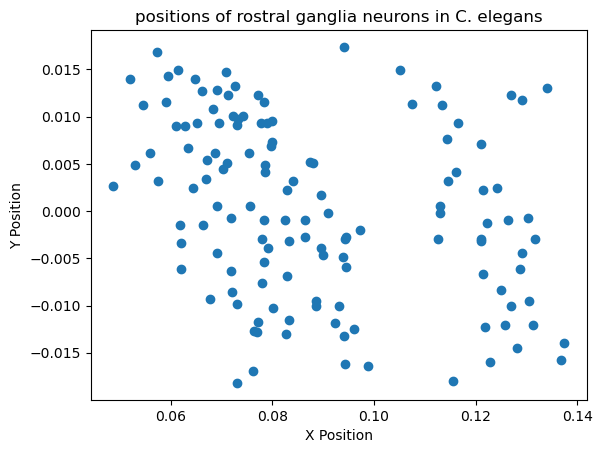

In [11]:
plt.scatter(neuron_positions['posx'], neuron_positions['posy'])

# Label axes
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("positions of rostral ganglia neurons in C. elegans")

# Show the plot
plt.show()

In [22]:
H=nx.Graph(edgelist)

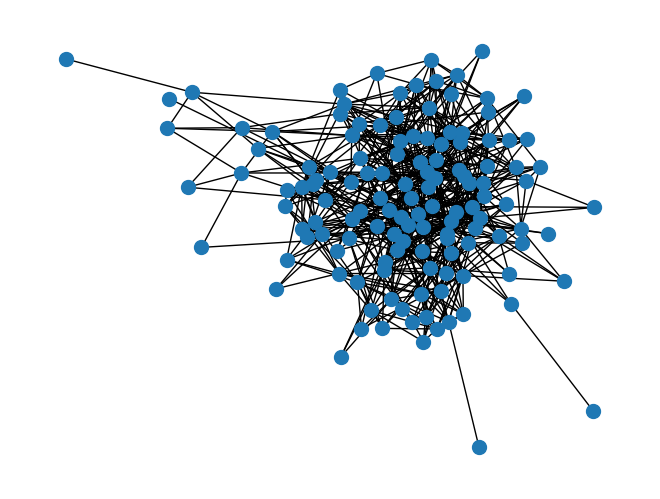

In [28]:
nx.draw(H, with_labels=False, node_size = 100)

In [47]:
short_path = dict(nx.all_pairs_shortest_path_length(H))
short_path

{11.0: {11.0: 0,
  0.0: 1,
  6.0: 1,
  8.0: 1,
  14.0: 1,
  20.0: 1,
  35.0: 1,
  71.0: 1,
  78.0: 1,
  79.0: 1,
  112.0: 1,
  114.0: 1,
  41.0: 1,
  43.0: 1,
  83.0: 1,
  26.0: 2,
  69.0: 2,
  18.0: 2,
  2.0: 2,
  15.0: 2,
  16.0: 2,
  24.0: 2,
  46.0: 2,
  10.0: 2,
  45.0: 2,
  3.0: 2,
  7.0: 2,
  29.0: 2,
  31.0: 2,
  34.0: 2,
  73.0: 2,
  80.0: 2,
  100.0: 2,
  116.0: 2,
  12.0: 2,
  17.0: 2,
  19.0: 2,
  25.0: 2,
  97.0: 2,
  101.0: 2,
  9.0: 2,
  1.0: 2,
  72.0: 2,
  21.0: 2,
  42.0: 2,
  13.0: 2,
  27.0: 2,
  30.0: 2,
  33.0: 2,
  38.0: 2,
  40.0: 2,
  47.0: 2,
  49.0: 2,
  51.0: 2,
  55.0: 2,
  65.0: 2,
  66.0: 2,
  126.0: 2,
  127.0: 2,
  128.0: 2,
  129.0: 2,
  48.0: 2,
  63.0: 2,
  84.0: 2,
  85.0: 2,
  86.0: 2,
  87.0: 2,
  88.0: 2,
  89.0: 2,
  90.0: 2,
  91.0: 2,
  104.0: 2,
  117.0: 2,
  118.0: 2,
  125.0: 2,
  60.0: 2,
  61.0: 2,
  62.0: 2,
  64.0: 2,
  70.0: 2,
  74.0: 2,
  50.0: 2,
  52.0: 2,
  67.0: 2,
  68.0: 2,
  81.0: 2,
  82.0: 2,
  94.0: 2,
  95.0: 2,
  130.0: 2

In [49]:
short_path = dict(nx.all_pairs_shortest_path_length(H))
nodes = sorted(H.nodes())
n = len(nodes)
node_index = {node: i for i, node in enumerate(nodes)}

dist_matrix = np.full((n, n), np.inf)

for src, paths in short_path.items():
    for tgt, dist in paths.items():
        dist_matrix[node_index[src], node_index[tgt]] = dist

# Set diagonal to zero
np.fill_diagonal(dist_matrix, 0)

[[0. 2. 2. ... 3. 2. 3.]
 [2. 0. 3. ... 3. 2. 2.]
 [2. 3. 0. ... 2. 3. 2.]
 ...
 [3. 3. 2. ... 0. 2. 2.]
 [2. 2. 3. ... 2. 0. 2.]
 [3. 2. 2. ... 2. 2. 0.]]


In [54]:
np.max(dist_matrix)

6.0

In [50]:
def visualize_persistent_homology(X, style = 'barcodes', max_dimension = 2):

    """
    In: X is a Euclidean point cloud of size [num_points,dimension]
        style = 'barcodes' or 'diagrams'
        max_dimension = highest dimensional skeleton of the VR complex to compute. Highest degree
        persistent homology will be one less than this.
    Out: plots either persistence barcodes or persistence diagrams
    """
    
    D = pairwise_distances(X)
    skeleton = gd.RipsComplex(distance_matrix = D, max_edge_length = 10) 
    Rips_complex = skeleton.create_simplex_tree(max_dimension = max_dimension)
    BarCodes = Rips_complex.persistence()

    if style == 'barcodes':
        for dim in range(max_dimension):
            print('Dimension',dim)
            plt.figure()
            gd.plot_persistence_barcode([bar for bar in BarCodes if bar[0] == dim])
            plt.show()
    elif style == 'diagrams':
        plt.figure()
        gd.plot_persistence_diagram(BarCodes)
        plt.show()
            
    return
def visualize_ph_graphs(G, style = 'barcodes', max_dimension = 2):

    """
    In: X is a networkX graph
        max_dimension = highest dimensional skeleton of the VR complex to compute. Highest degree
        persistent homology will be one less than this.
    Out: plots either persistence barcodes or persistence diagrams
    """
    
    short_path = dict(nx.all_pairs_shortest_path_length(H))
    nodes = sorted(H.nodes())
    n = len(nodes)
    node_index = {node: i for i, node in enumerate(nodes)}

    D = np.full((n, n), np.inf)

    for src, paths in short_path.items():
        for tgt, dist in paths.items():
            D[node_index[src], node_index[tgt]] = dist

    # Set diagonal to zero
    np.fill_diagonal(D, 0)
    
    skeleton = gd.RipsComplex(distance_matrix = D, max_edge_length = 10) 
    Rips_complex = skeleton.create_simplex_tree(max_dimension = max_dimension)
    BarCodes = Rips_complex.persistence()

    if style == 'barcodes':
        for dim in range(max_dimension):
            print('Dimension',dim)
            plt.figure()
            gd.plot_persistence_barcode([bar for bar in BarCodes if bar[0] == dim])
            plt.show()
    elif style == 'diagrams':
        plt.figure()
        gd.plot_persistence_diagram(BarCodes)
        plt.show()
            
    return

In [39]:
X = np.stack((np.array(neuron_positions['posx'].astype(float)), np.array(neuron_positions['posy'].astype(float)))).T

In [41]:
X

array([[ 0.08239339, -0.0009838 ],
       [ 0.08327901, -0.0031842 ],
       [ 0.08263934, -0.01303537],
       [ 0.08327901, -0.0115121 ],
       [ 0.0863286 , -0.00270545],
       [ 0.08646321, -0.00097975],
       [ 0.06517686,  0.00934612],
       [ 0.05903012,  0.0115121 ],
       [ 0.07544099,  0.00612346],
       [ 0.0619795 , -0.00614876],
       [ 0.06196938, -0.00342914],
       [ 0.04869818,  0.00270545],
       [ 0.05756049,  0.0031842 ],
       [ 0.0940563 , -0.01322667],
       [ 0.06911207,  0.0004919 ],
       [ 0.07176691, -0.00073481],
       [ 0.07796628, -0.00762446],
       [ 0.08009481, -0.01028741],
       [ 0.07550678,  0.0004919 ],
       [ 0.07838025, -0.00097975],
       [ 0.07698248, -0.01278942],
       [ 0.07715556, -0.01175704],
       [ 0.06345521,  0.00664066],
       [ 0.0627042 ,  0.00906272],
       [ 0.08854215, -0.01008397],
       [ 0.08866765, -0.00955259],
       [ 0.06862017,  0.00614876],
       [ 0.06711309,  0.00538864],
       [ 0.08952595,

<Figure size 640x480 with 0 Axes>

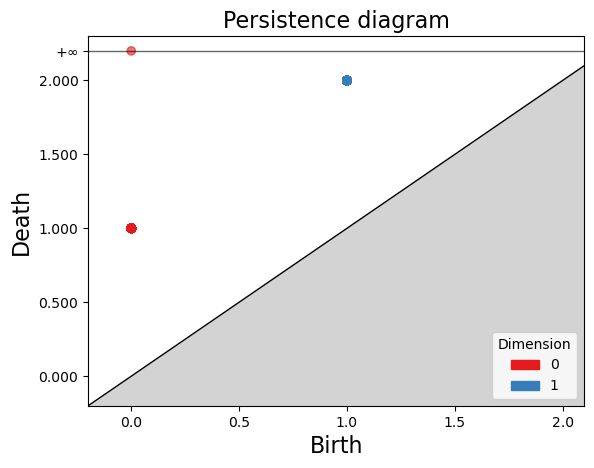

In [52]:
visualize_ph_graphs(H, style = 'diagrams')

Dimension 0


C:\Users\anash\anaconda3\Lib\site-packages\gudhi\persistence_graphical_tools.py:129: UserWarning: usetex mode requires TeX.
  warnings.warn("usetex mode requires TeX.")


<Figure size 640x480 with 0 Axes>

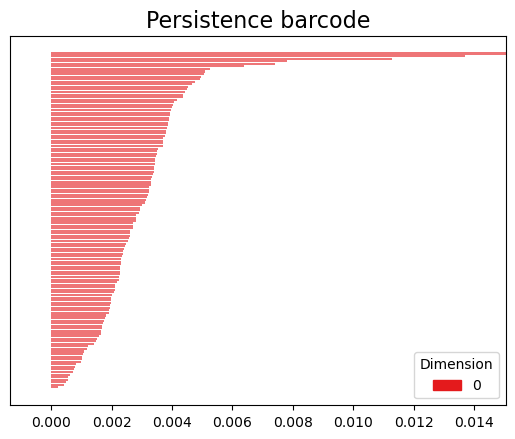

Dimension 1


<Figure size 640x480 with 0 Axes>

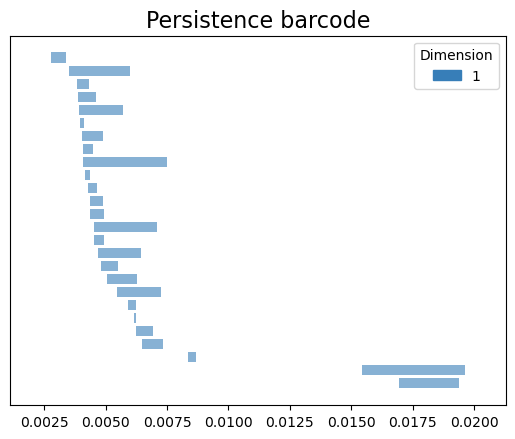

In [42]:
visualize_persistent_homology(X)

<Figure size 640x480 with 0 Axes>

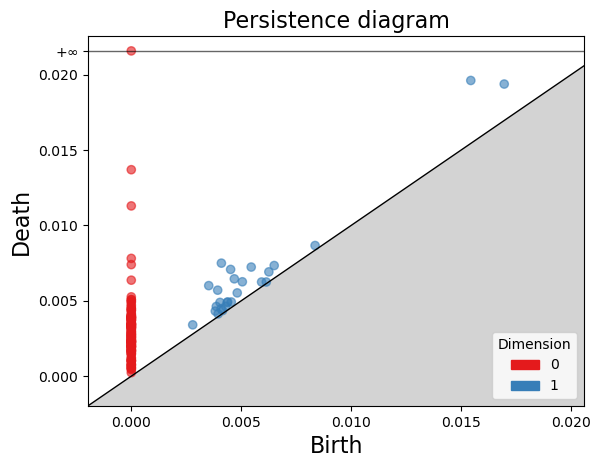

In [43]:
visualize_persistent_homology(X, style = 'diagrams')

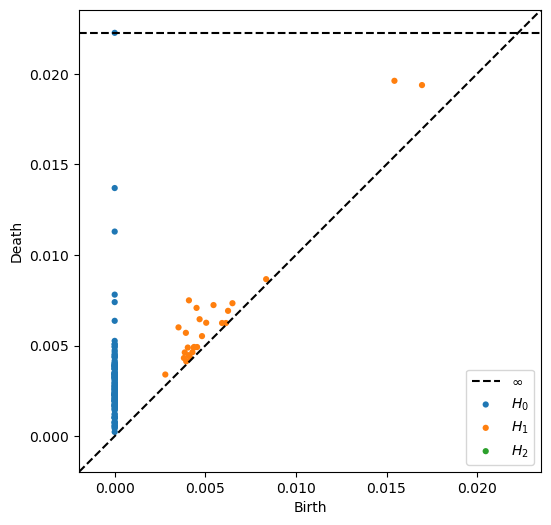

CPU times: total: 1.14 s
Wall time: 199 ms


In [55]:
%%time
dgms = ripser(X, maxdim=2)['dgms']
fig = plt.figure(figsize=(6,6))
plot_diagrams(dgms, show=True)